# <center>Astro 540 Project --- W. Crumrine</center>
## <center>Likelihood Analyses for Standard, $\gamma$IDM and $\nu$IDM Cosmological Models</center>

### <center>Observational data suggests shortcomings in  $\Lambda$CDM cosmological models that could potentially find resolution by allowing Dark Matter (DM) to interact with standard model particles. Herein we do likelihood analysis on two such model varieties (in which DM interacts with photons or neutrinos). We then compare our results to our own reproduction of the fiducial $\Lambda$CDM likelihood analysis. Note that we allow fraction of IDM (relative to CDM) to vary in both $\gamma$IDM and $\nu$IDM cases in an effort to assess the plausibilty that DM may consist of multiple species.</center>


### <center>Contents</center>

#### <center>Part 1 - Background</center>
#### <center>Part 2 - Procedure and Required Files</center>
#### <center>Part 3 - Results and Analysis</center>

## Part 1 - Background 

### Likelihood analysis is a statistical tool that sits at the intersection of cosmological theory and observational data. It allows us to calculate, given the data that we have at our fingertips, how *likely* is any given theoretical model. Each theoretical model is wrapped up in a number of assumptions and is thus quantified as a set of parameters representing a point in a many dimensional parameter space. Likelihood analysis allows us to determine, given the data we observe, the “likeliness” of the theoretical model that corresponds to a given point in parameter space.

### The *data* we use to assess the "likeliness" of the different theoretical models (of the $\Lambda$CDM, $\gamma$CDM and $\nu$CDM varieties) is from the Planck 2018 realization of the CMB temperature angular power spectrum (https://arxiv.org/pdf/1807.06209.pdf). To run the likelihood analyses, we use the software Cobaya (https://cobaya.readthedocs.io/en/latest/) to step through parameter space, assessing a goodness of fit between the *theoretical* CMB angular power spectrum (associated with a given model, aka point in parameter space) and the obervational *data* provided. With the help of MCMC (given the vastness of parameter space), Cobaya  assigns a probability to every model that indicates that model's "likeliness" given the data. In this way, Cobaya provides us with a multi-dimensional probability distribution called the "Posterior" which indicates which models are likelier than others and, ultimately, which one in particular (that with the highest probability) is most favored. 

### The specific *data* used by Cobaya will be the union of three 2018 Planck datasets, the TT, EE and TTTEEE_lite. To generate the *theoretical* CMB angular power spectra for a given point in parameter space, Cobaya will run the appropriate version of CLASS (the Cosmic Linear Anisotropy Solving System https://lesgourg.github.io/class_public/class.html) which uses linear perturbation theory to solve the coupled Einstein-Boltzmann equations through time. For both the $\Lambda$CDM as well as $\gamma$IDM models, we use the latest version of LesGourg's original CLASS code found at https://github.com/lesgourg/class_public. To explore $\nu$IDM models, we use a version created by Mosbech and his collaborators, which allows for these non-standard interactions, and which Rui and I modified to allow for the fractional cases. The latter code can be found in this respository under CLASS_InNu-DM.

## Part 2 - Procedure and Required Files

### Note: All files mentioned below are located in this repository.

### Once I installed Cobaya in my home directory, I initiated (after much debugging) the three likelihood anaylses under investigation (for $\Lambda$CDM, $\gamma$IDM and $\nu$IDM) by submitting three separate slurm jobs to the Discovery Cluster. Each exploration was submitted using the command >sbatch slurm_DISCOVERY.sh, where the .sh file submitted was edited differently for each investigation, containing the name of the parameter file specific to that investigation (Standard_Input_File.yaml, PHO_fraction_Input.yaml or NU_fraction_Input.yaml) as well as commands to activate the appropriate conda environment, to run cobaya, to specificy memory distribution, and more. Note, once a job is submitted, the .yaml file indicated in the .sh file is called in the course of the exploration and contains information on the version of CLASS required by the investigation, the regions of parameter space to be investigated (priors), and more. 

### The $\gamma$IDM exploration arrived at converegence after about 14 days on the cluster (R-1 ~ 0.00711), however the $\nu$IDM exploration had only partially approached convergence after approximately three weeks (R-1 ~ 0.07360) and continues. Despite discovering an error in my $\Lambda$CDM output last minute and having to scramble to re-run MCMC for $\Lambda$CDM, we are nearly at convergence (R-1 ~ 0.0302) after 30 hours, though MCMC continues to run. Despite non-total convergence for $\nu$IDM and $\Lambda$CDM, the best fit models are well within Planck error bars (see below).  

### The output for these explorations are in the form of MCMC "chains", a set of coordinate points in parameter space whose density of points increases with proximity to the point/model of best fit. These are then visualized using the getdist software (https://getdist.readthedocs.io/en/latest/) which converts these "chain" representations of the posterior probability distribution into the contour plots seen below.


## Part 3 - Results and Analysis

### A - Visualizing the Posterior

### We first visualize the multidimensional posterior probability distributions for each of the parameter spaces under investigation (the $\Lambda$CDM, $\gamma$CDM and $\nu$CDM model varieties) in our triangle plots below. The posterior distribution for a single parameter (or pair of parameters) can be retrieved by marginalizing over all other parameters in the given parameter space, providing us a visualization of the values most favored by the data. (Note: the contours of the constraints imposed by the combined Planck data sets are at 68% and 95% confidence intervals.)

In [46]:
# import necessary modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from Helper_Functions_CLS import Get_LCDM_Cls, Get_PHO_Cls
import pandas as pd
import getdist 
from getdist import plots


# for crisper plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size']=11
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stix'
plt.rcParams['figure.figsize']= (6.5,4)
plt.rcParams['figure.dpi']=150
plt.rcParams['axes.facecolor'] = 'white'


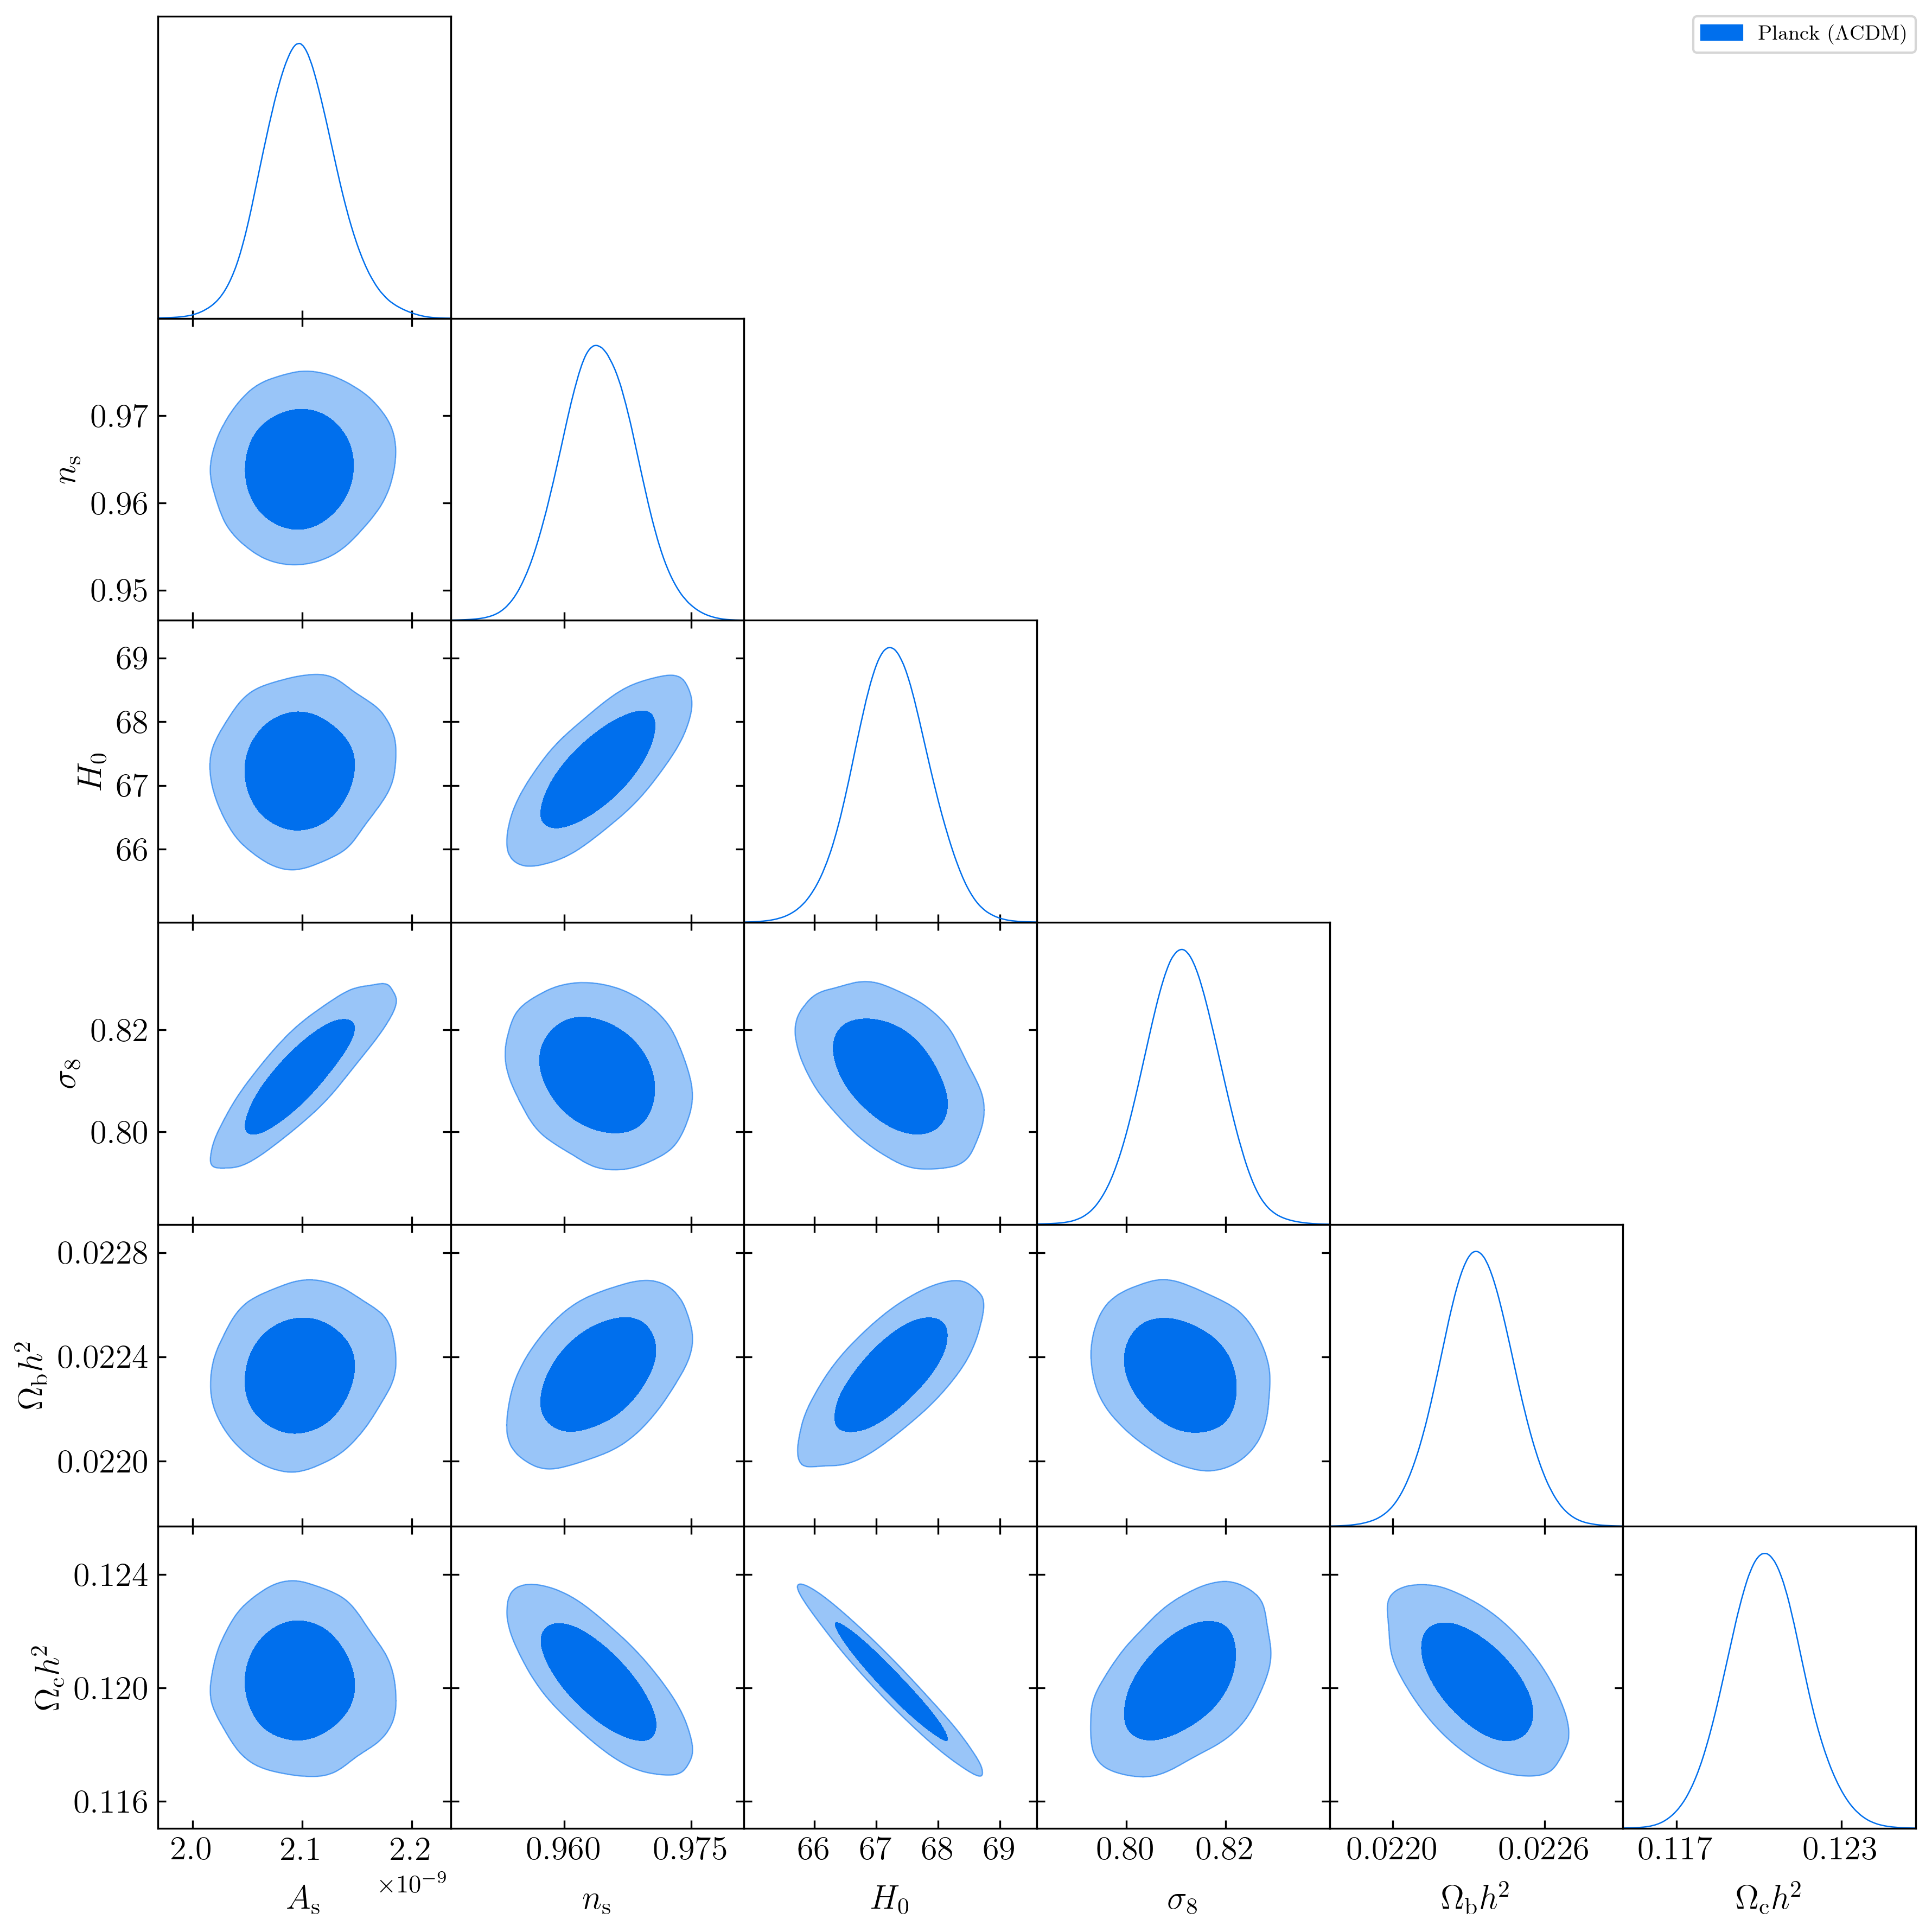

In [47]:
# Plot contours of LCDM using getdist

g=plots.get_subplot_plotter(chain_dir=r'/Users/wendycrumrine/Desktop/Cosmology Project/Upload to Git/chains_planck')
roots = ['planck']
params = ['A_s', 'n_s', 'H0', 'sigma8', 'omega_b', 'omega_cdm']
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 18
labels = ["Planck ($\Lambda$CDM)"]
g.triangle_plot(roots, params, filled=True,  legend_labels=labels, legend_loc="upper right")


g.settings.legend_fontsize=18

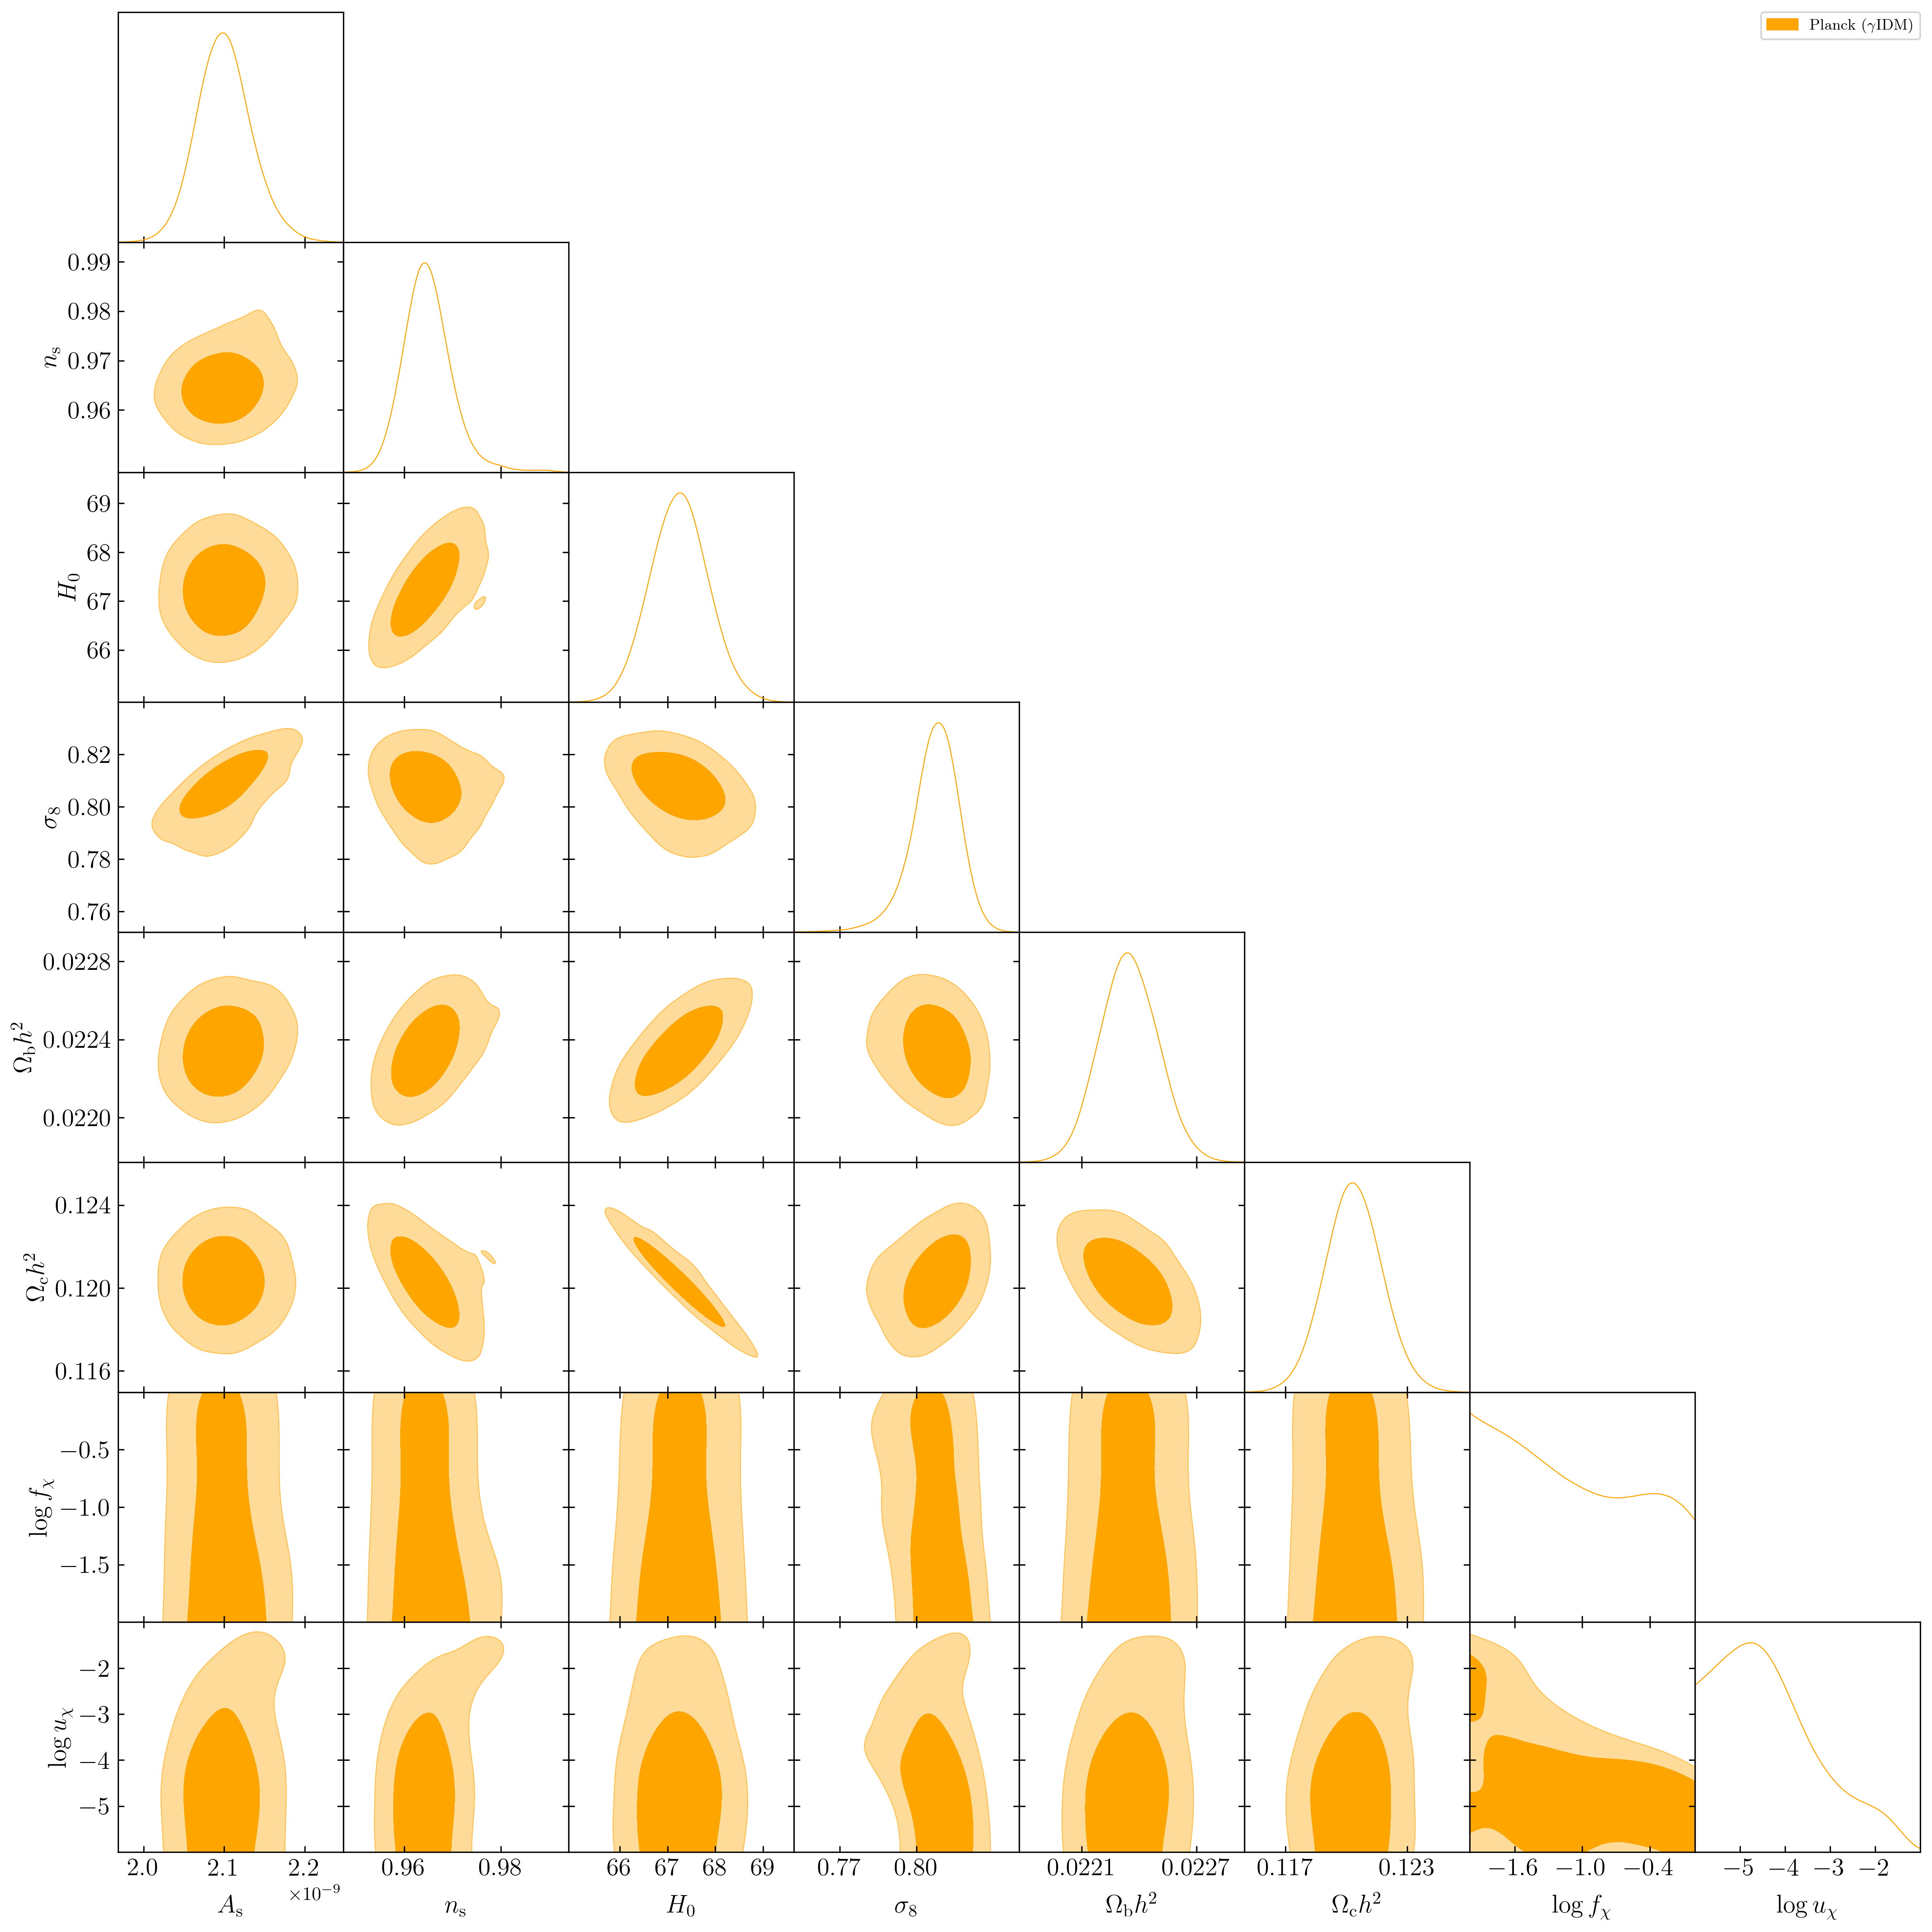

In [48]:
# Plot contours of PHO-IDM using getdist

g=plots.get_subplot_plotter(chain_dir=r'/Users/wendycrumrine/Desktop/Cosmology Project/Upload to Git/chains_planck_PHO')
roots = ['planck']
params = ['A_s', 'n_s', 'H0', 'sigma8', 'omega_b', 'omega_cdm', 'logf_idm', 'logu_idm']
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 18
labels = ["Planck ($\gamma$IDM)"]
g.triangle_plot(roots, params, filled=True,  legend_labels=labels, legend_loc="upper right", contour_colors=["orange"])


g.settings.legend_fontsize=18

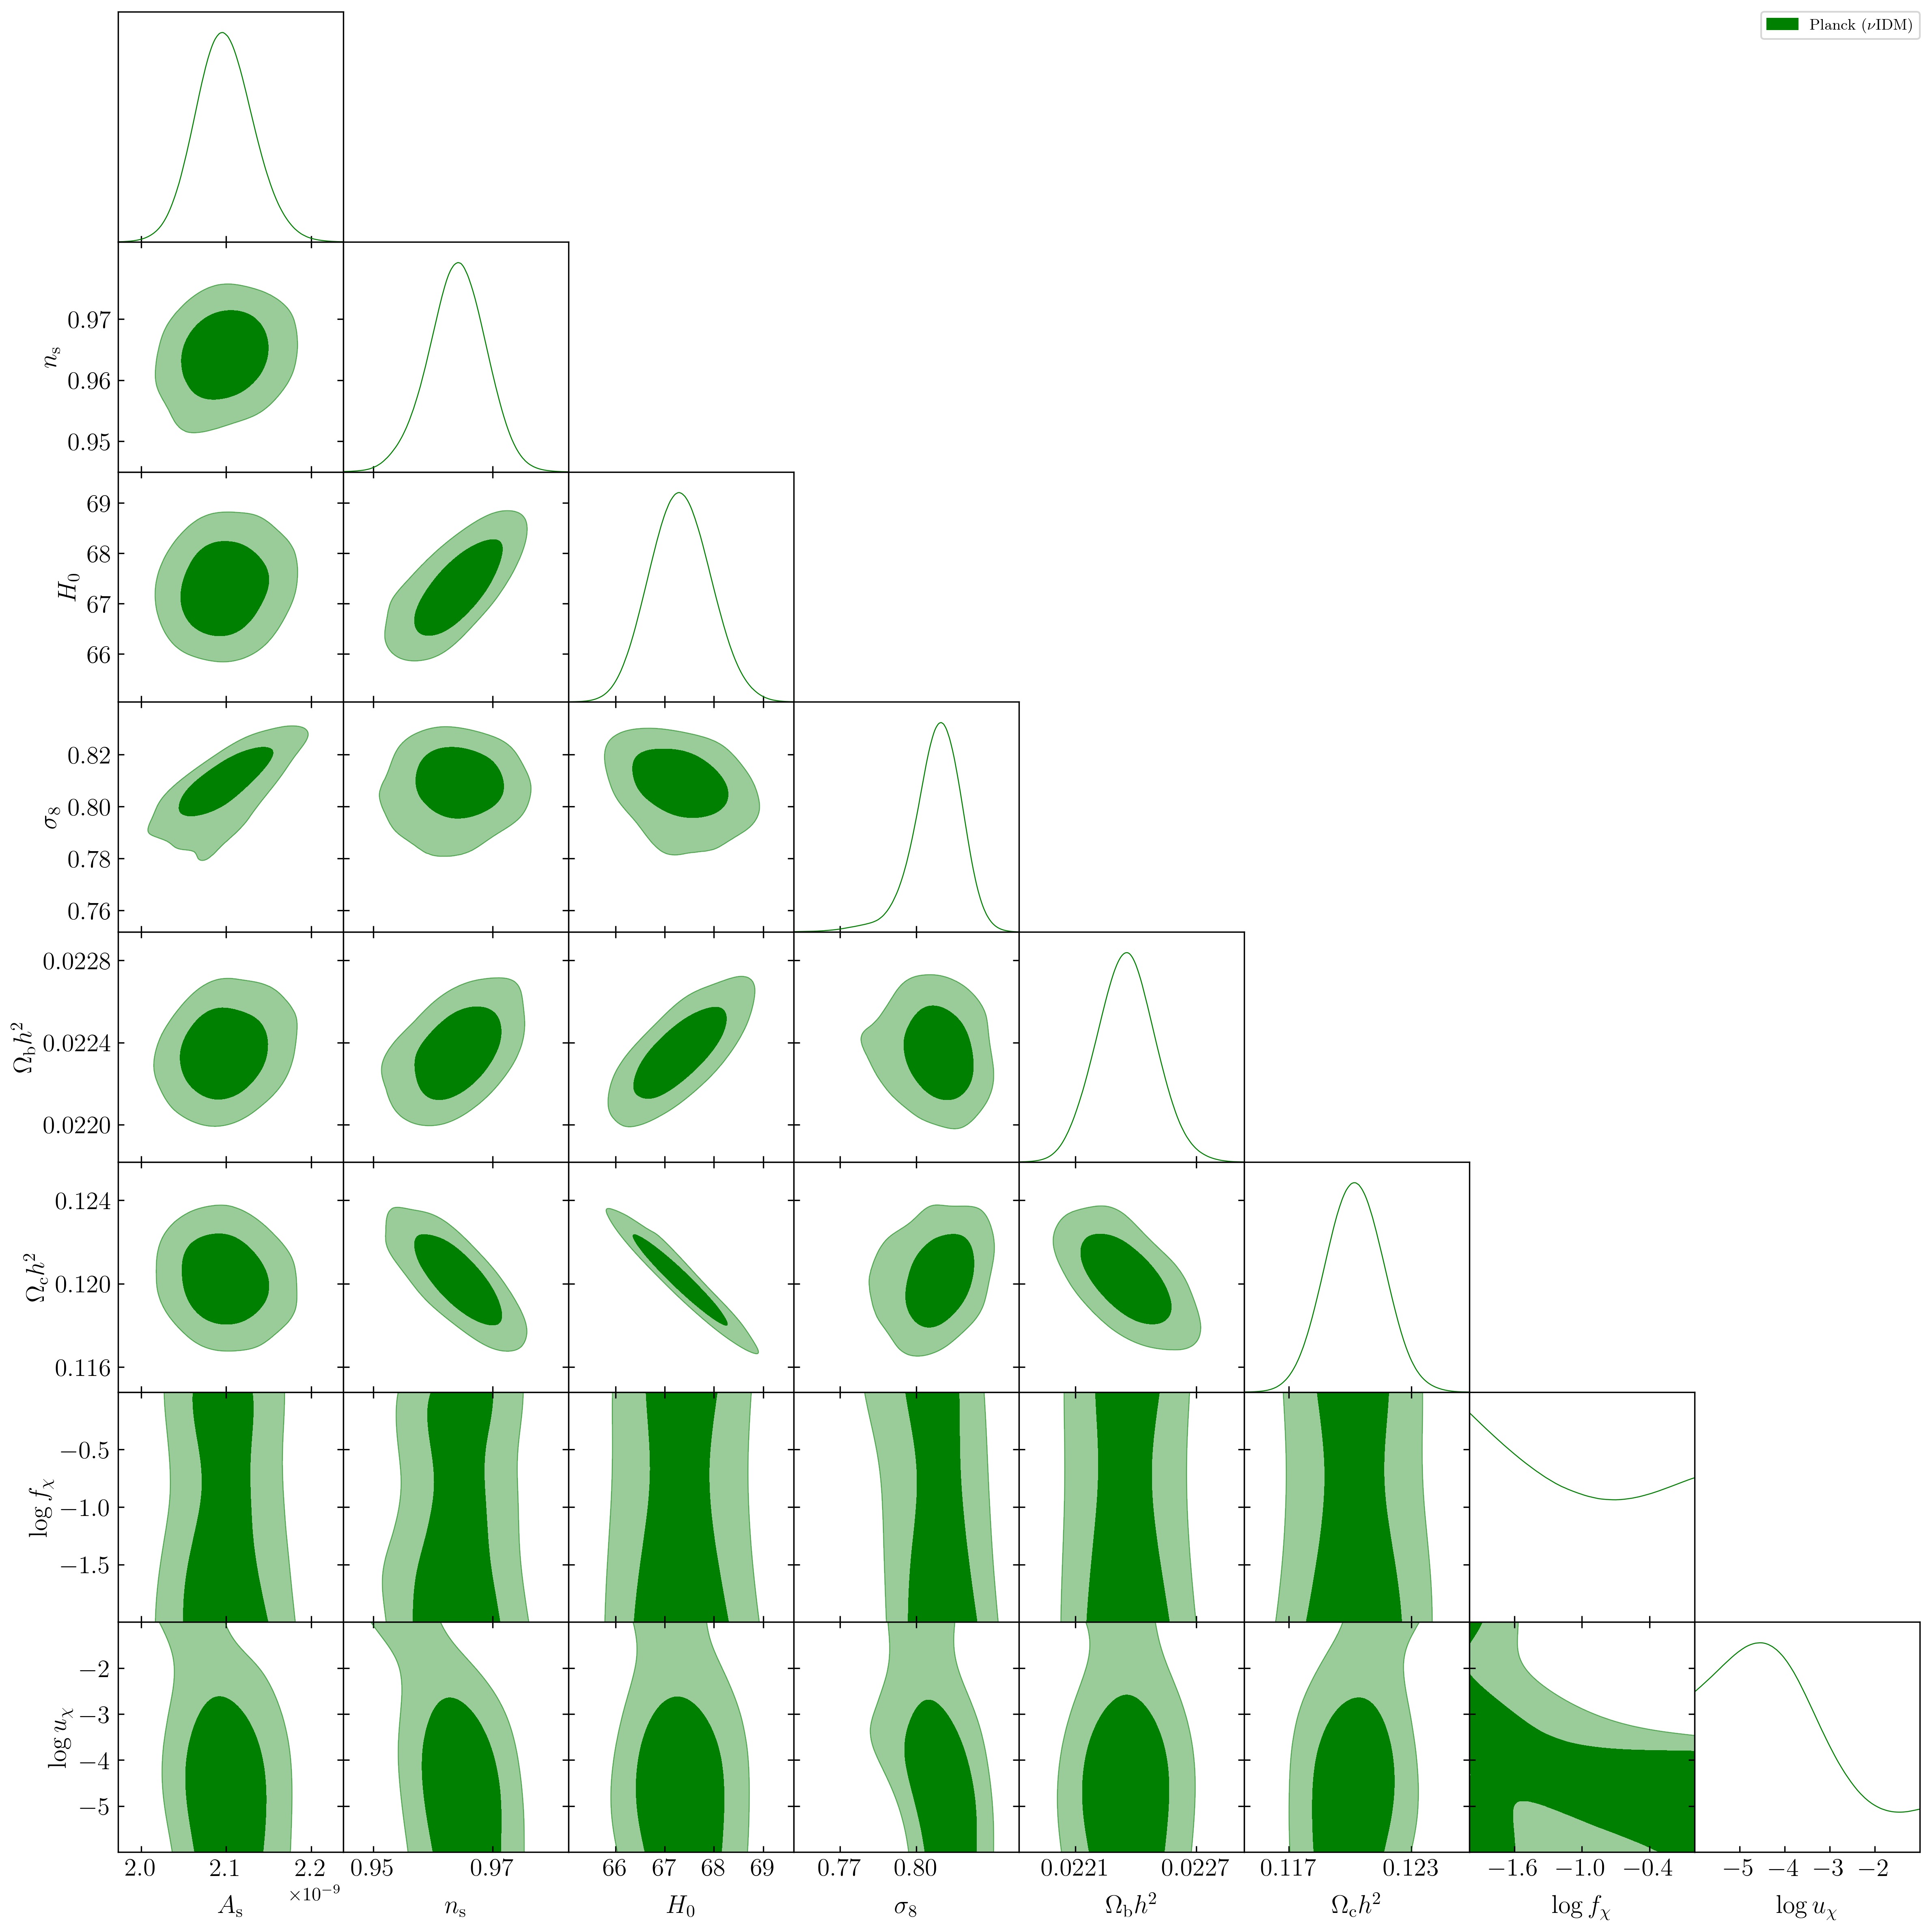

In [49]:
# Plot contours of NU-IDM using getdist

g=plots.get_subplot_plotter(chain_dir=r'/Users/wendycrumrine/Desktop/Cosmology Project/Upload to Git/chains_planck_NU')
roots = ['planck']
params = ['A_s', 'n_s', 'H0', 'sigma8', 'omega_b', 'omega_cdm', 'logf_nudm', 'u1']
g.settings.axes_fontsize = 18
g.settings.axes_labelsize = 18
labels = [r"Planck ($\nu$IDM)"]
g.triangle_plot(roots, params, filled=True,  legend_labels=labels, legend_loc="upper right", contour_colors=["green"])


g.settings.legend_fontsize=18

### We see that the posterior distributions are Gaussian for $\Lambda$CDM but exhibit less uniform shapes for certain parameters of the interacting models, dark matter fraction in particular, thus preventing us from arriving at unequivocal best fit values this parameter.



### B - Examining IDM Fraction and Interaction Strength

### Below, we have zoomed in on a single tile of interest (one for each IDM model type). Specifically, I'm curious what values of interaction strength ($u_\chi$) and fractions of IDM relative to CDM ($f_\chi$) are favored by Planck, and hope to use these constraints as priors in future analyses. 

### HOWEVER, I made a mistake! When I created my .yaml files, I set priors for interaction strength for both IDM model types, setting a minimum bound of 10^-6. However, using transfer function analysis of the Milky Way Satellite population (via the min halo mass method) I'm getting upper bounds *below* 10^-6 for the $f_\chi=1$ case. Thus, I should have set an even lower prior bound to view that relevant region of parameter space. That said, the countours of the tiles below imply that Planck's constraints are likely still consistent with those I'm finding using the Milky Way data. But redoing this analysis with the corrected priors is coming soon.

(1, 1)

<Figure size 900x675 with 0 Axes>

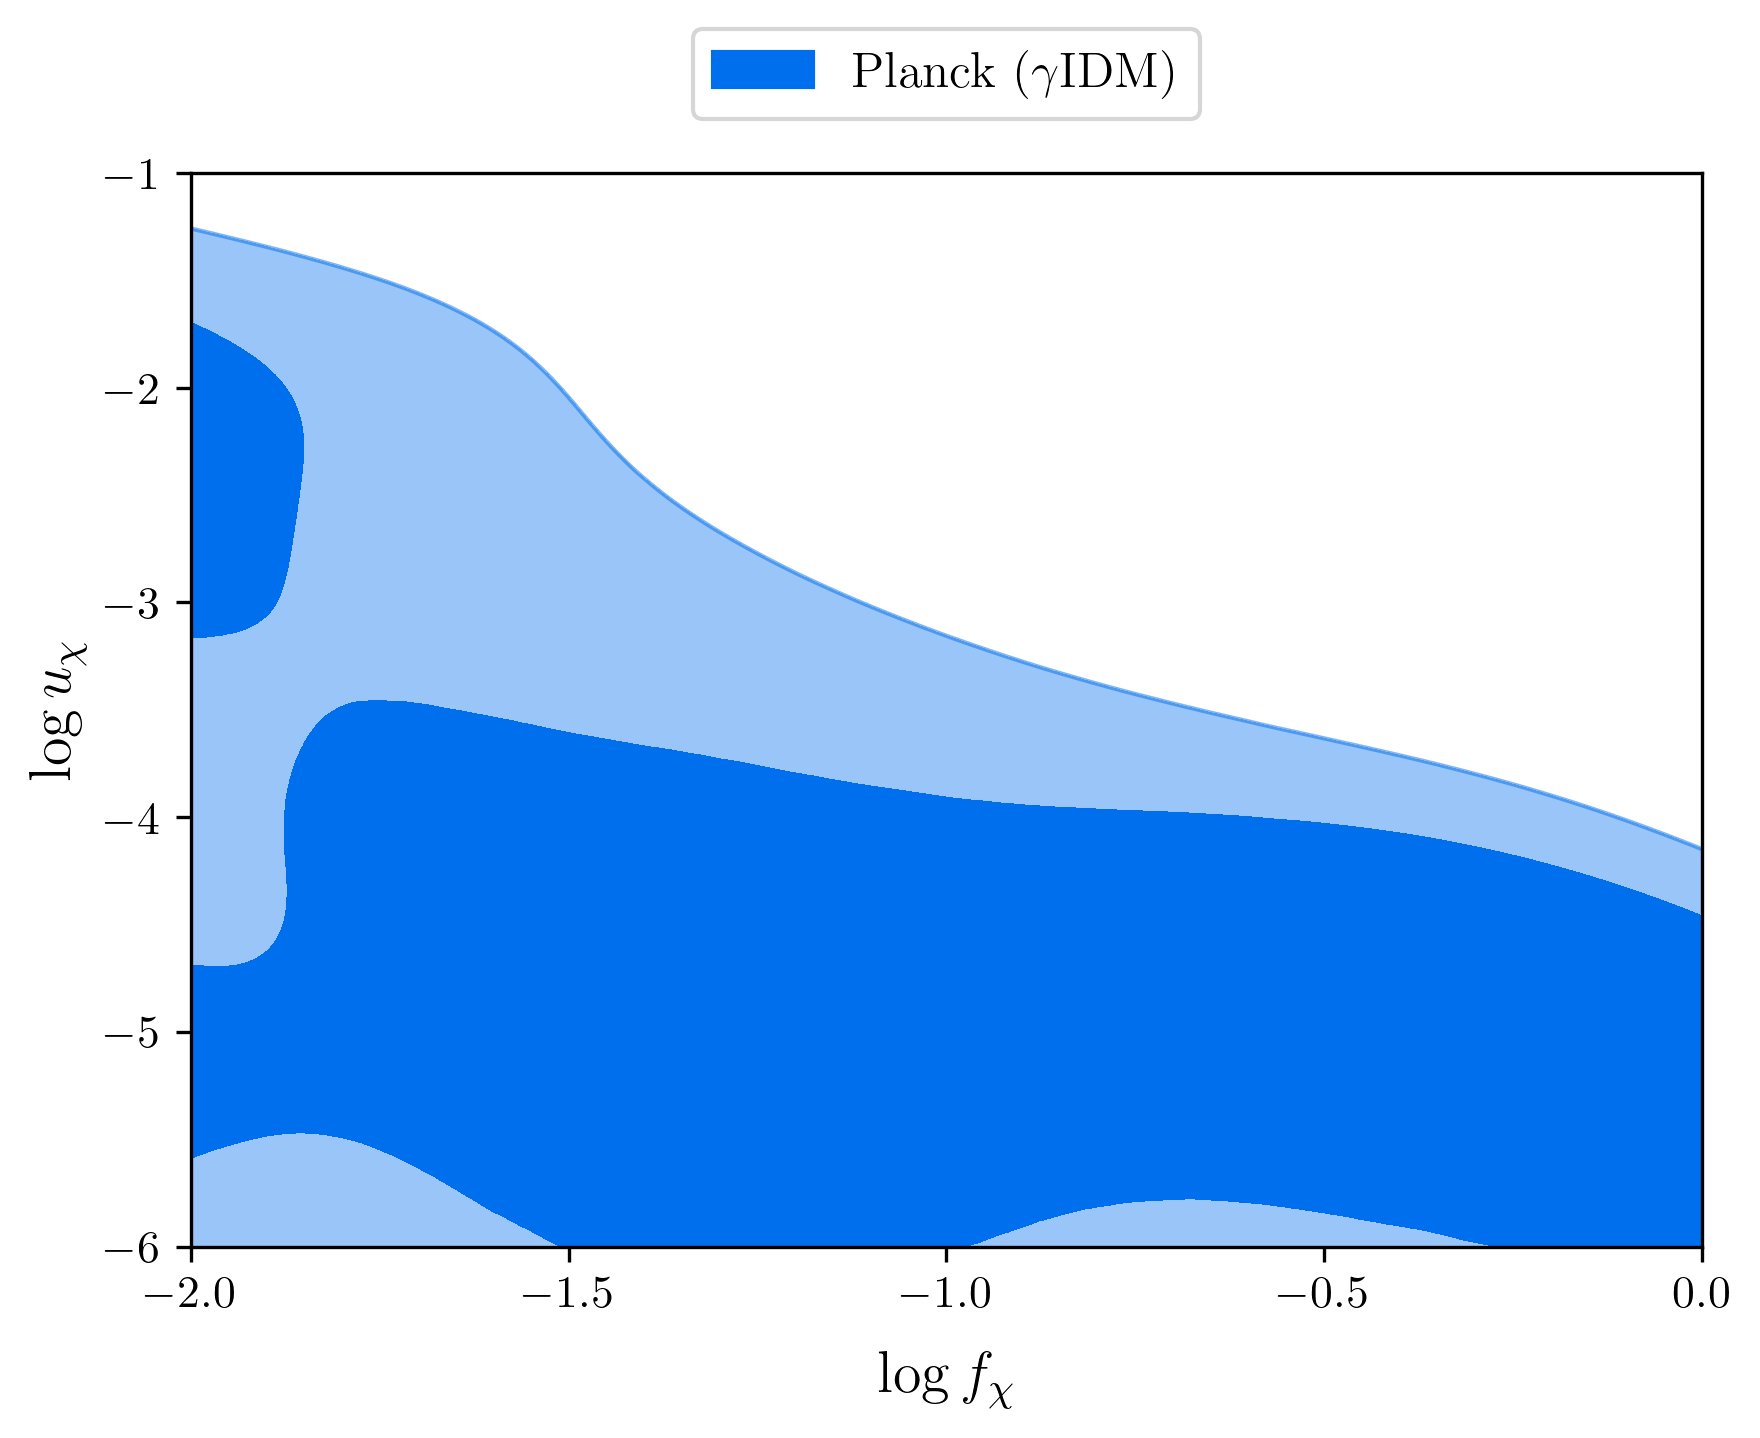

<Figure size 900x675 with 0 Axes>

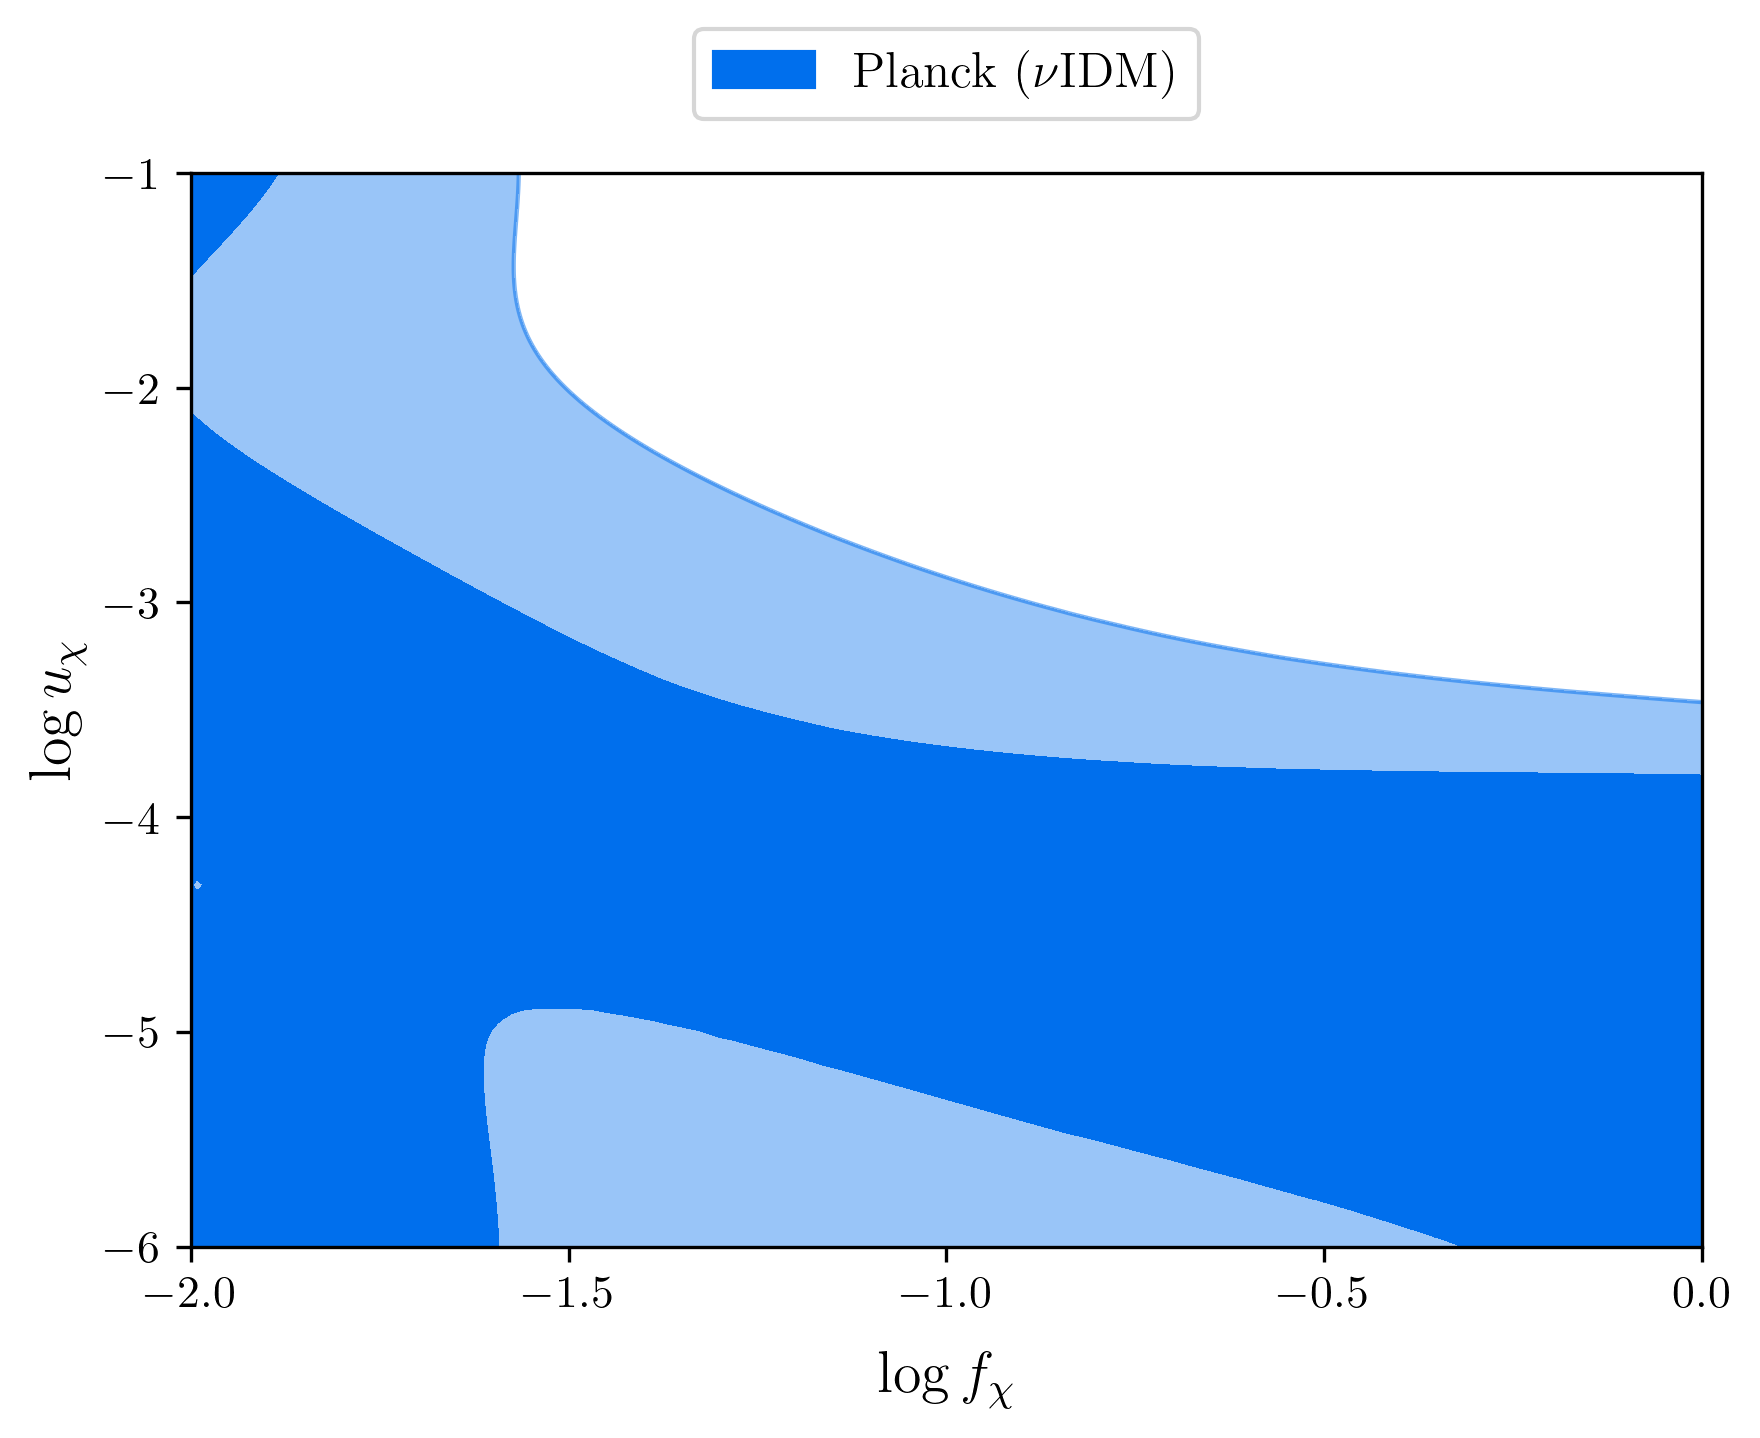

In [50]:
# PHO-IDM case

g=plots.get_single_plotter(chain_dir=r'/Users/wendycrumrine/Desktop/Cosmology Project/Upload to Git/chains_planck_PHO')
roots = ['planck']
pairs = [['logf_idm', 'logu_idm']]
labels = ["Planck ($\gamma$IDM)"]
g.plots_2d(roots, param_pairs=pairs, filled=True, shaded=False, legend_labels=labels, legend_loc="upper right",labels = ["Planck ($\Lambda$CDM)"])

# NU- IDM case

g=plots.get_single_plotter(chain_dir=r'/Users/wendycrumrine/Desktop/Cosmology Project/Upload to Git/chains_planck_NU')
roots = ['planck']
pairs = [['logf_nudm', 'u1']]
labels = [r"Planck ($\nu$IDM)"]
g.plots_2d(roots, param_pairs=pairs, filled=True, shaded=False, legend_labels=labels, legend_loc="upper right",labels = ["Planck ($\Lambda$CDM)"])



## C - The CMB Temp Power Spectrum of the Different Best Fit Models

### Below, we plot in a single figure the theoretical CMB angular power spectrum associated with the point in parameter space that best fits the data (aka, the likeliest model) -- for all three investigations. We plot these alongside the actual Planck 2018 data (accessed at https://pla.esac.esa.int/#cosmology) which Cobaya utilized for generating the best fits. Immediately below that, to better visualize the subtle differences between the models, we plot the ratios of the interacting model $C_l$'s to the $\Lambda$CDM model. 

In [51]:
# Generate Cl's of LCDM Model (Best Fit)
h=0.672789; omega_b=0.0223144; omega_cdm=0.120138; tau_reio=0.0493739; A_s=2.1e-9; n_s=0.964599; P_k_max=130; k_per_decade=30;
N_ur=2.0328; N_ncdm=1
ll, clTT, clEE, clTE = Get_LCDM_Cls(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, N_ur, N_ncdm)

In [52]:
# Generate Cl's of PHO-IDM Model (Best Fit)
h=0.671806; omega_b=0.0223221; omega_cdm=0.120389; tau_reio=0.0508351; A_s=2.1e-09; n_s=0.964482; P_k_max=130; k_per_decade=30;
N_ur=2.0328; N_ncdm=1; f_idm=10**(-0.174515); m_idm=1e9; u_idm_g = 10**(-4.7278);
ll_PHO, clTT_PHO, clEE_PHO, clTE_PHO = Get_PHO_Cls(h, omega_b, omega_cdm, tau_reio, A_s, n_s, P_k_max, k_per_decade, f_idm, m_idm, u_idm_g, N_ur, N_ncdm)

In [53]:
# Load Cl's of NU-IDM Model (Best Fit) which were generated in a separate notebook/conda environment
# as required by the different version of class. Notebook is saved in this repository.
clTT_NU = np.genfromtxt('NU_cls.txt')

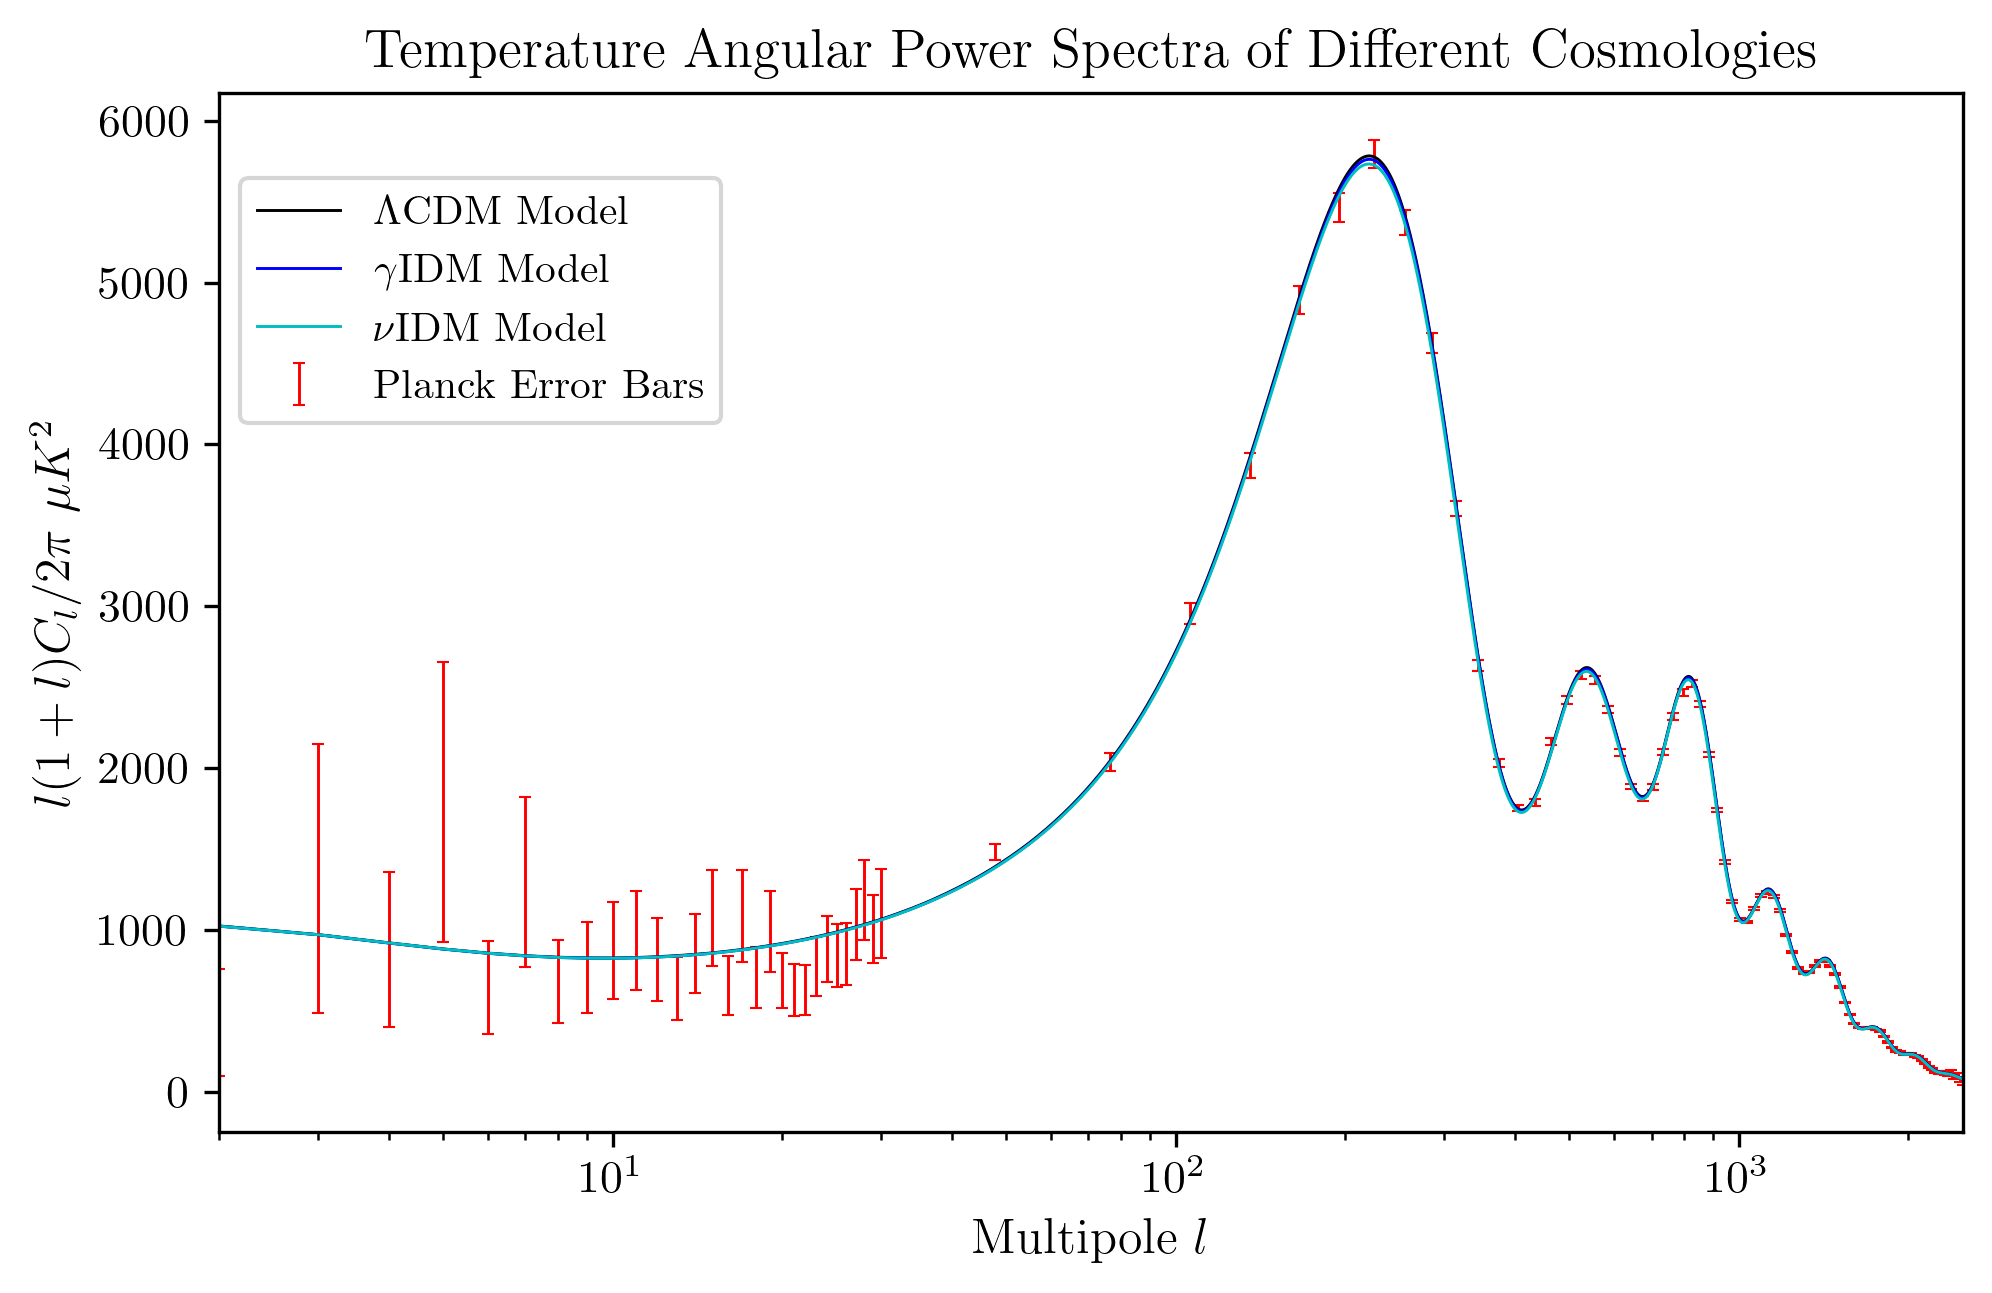

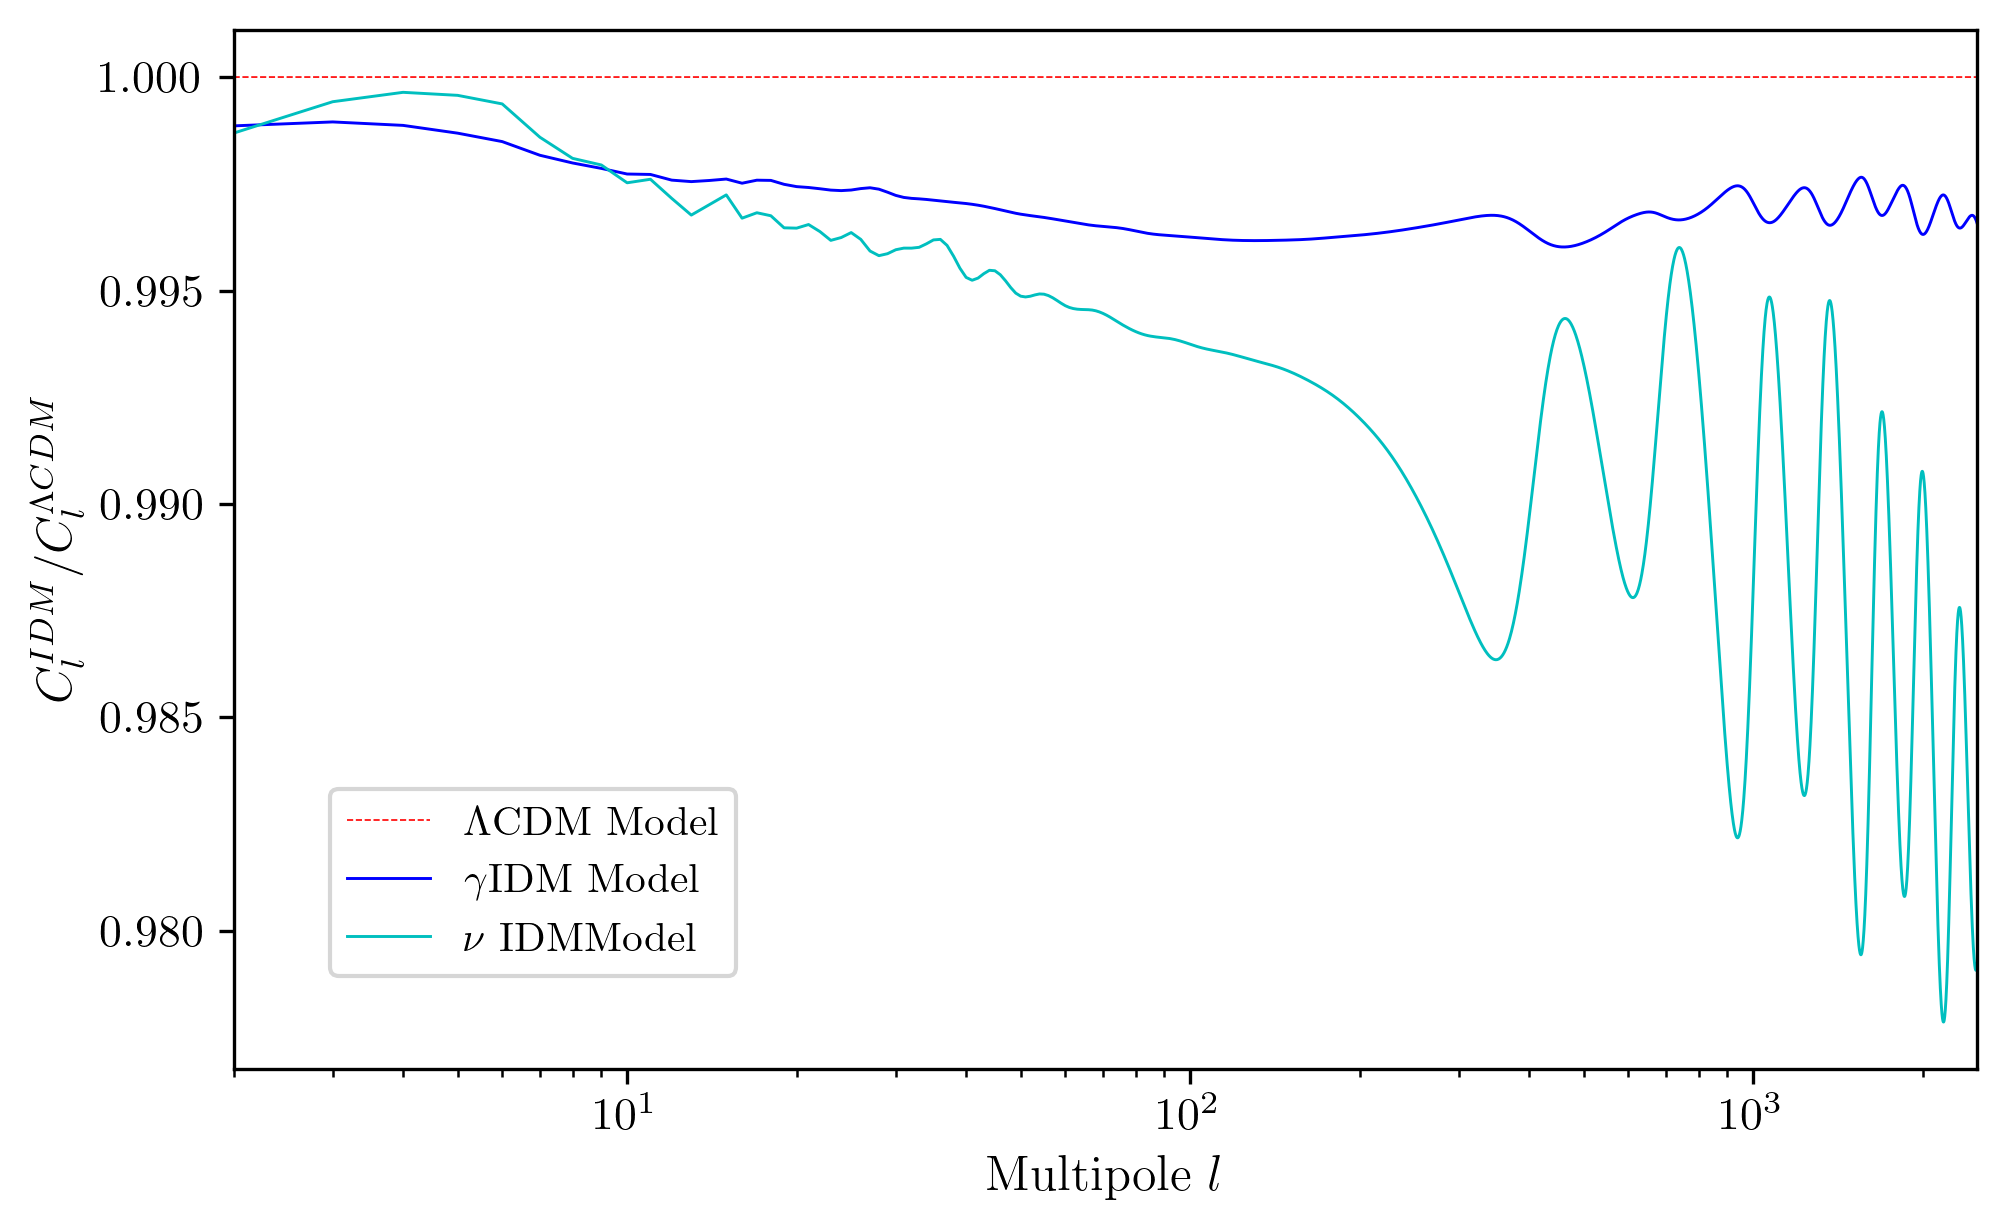

In [54]:
# Load Planck Error Bar Data
errors = np.genfromtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')
l_errors = errors[:,0]
d_l = errors[:,1]
err = [errors[:,2],errors[:,3]]

errors_low = np.genfromtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt')
l_errors_low = errors_low[:,0]
d_l_low = errors_low[:,1]
err_low = [errors_low[:,2],errors_low[:,3]]

#Plot Data

plt.rcParams["figure.figsize"] = [7.50, 4.5]

fig1 = plt.figure("one")

plt.errorbar(l_errors, d_l, yerr=err, fmt='none', ecolor = 'r', elinewidth = 0.7, capsize = 1.5, capthick = 0.5, label='Planck Error Bars')
plt.errorbar(l_errors_low, d_l_low, yerr=err_low, fmt='none', ecolor = 'r', elinewidth = 0.7, capsize = 1.5, capthick = 0.5)
plt.plot(ll,(2.7255e6)**2*clTT*(ll*(ll+1))/(2*np.pi), 'k', lw=0.7, label='$\Lambda$CDM Model')
plt.plot(ll_PHO,(2.7255e6)**2*clTT_PHO*(ll_PHO*(ll_PHO+1))/(2*np.pi), 'b',  lw=0.7, label='$\gamma$IDM Model')
plt.plot(ll_PHO,(2.7255e6)**2*clTT_NU*(ll_PHO*(ll_PHO+1))/(2*np.pi), 'c', lw=0.7, label=r'$\nu$IDM Model')

plt.xlim([2,2500])
plt.xscale('log')
plt.title('Temperature Angular Power Spectra of Different Cosmologies')
plt.xlabel('Multipole $l$',fontsize=12)
plt.ylabel(r'$l(1+l)C_l/2\pi$ $\mu K^2$',fontsize=12)
plt.legend(loc='right',fontsize=10, bbox_to_anchor=(0.3, 0.8))

fig2 = plt.figure("two")

plt.plot(ll, np.ones(len(ll)), '--r', lw=0.4, label=r'$\Lambda$CDM Model')
plt.plot(ll, clTT_PHO/clTT, 'b', lw=0.7, label='$\gamma$IDM Model')
plt.plot(ll, clTT_NU/clTT, 'c', lw=0.7, label=r'$\nu$ IDMModel')

plt.xlim([2,2500])
plt.xscale('log')
plt.xlabel('Multipole $l$',fontsize=12)
plt.ylabel(r'$C_l^{IDM}/C_l^{\Lambda CDM}$',fontsize=12)
plt.legend(loc='right',fontsize=10, bbox_to_anchor=(0.3, 0.18))


### As expected, having been chosen via MCMC as best fits, all three models lie within the Planck error bars, practically on top of one another. Quite satisfying to see! There is certainly a consistent dip in power of the interacting models relative to $\Lambda$CDM, perhaps due to the fact that, by coupling CDM to radiation, we are warming it, preventing it from falling into gravitational wells and forming structure. However, the differences are so slight, I hesitate to comment until we see full chain convergence. 



## D - Table of Best Fit Parameters and $\chi^2$ Analysis.

### Lastly, we summarize the parameters of each best fit model, as well as the associated $\chi^2$ value, in the table below. 

### $\chi^2$ equals $\sum_i\frac{(C_l^O - C_l^T)^2}{C_l^T}$, where $C_l^O$ are the $C_l$'s observed by Planck at the sampled $l$'s and $C_l^T$ are the corresponding theoretical projections. $\chi^2$ thus provides a statistical summary of how well the model fits the data, and the smaller its value, the better the fit. 

### We can then use $\Delta\chi^2$ (that is $\chi^2_{\Lambda CDM}-\chi^2_{IDM}$) to compare the strength of fit of two different models. We do this below, presenting $\chi^2_{\Lambda CDM}-\chi^2_{IDM}$ in the final row of the table. We see that our IDM models, at first glance, seem to have ever so slightly better fits to the data than the $\Lambda$CDM.

### HOWEVER, $\Delta\chi^2$ alone is useful only if we have two models of identical quanity of parameters. It turns out, adding free parameters will artificially improve any fit! If we do in fact find that either IDM model has smaller  $\chi^2$ than the $\Lambda$CDM, it must be smaller by $\sigma = \sqrt{\frac{\Delta\chi^2}{\Delta k_{dof}}}$ in order to claim it is actually preferred by the data.  (Note, $\Delta k_{dof}$ are the additional number of free parameters of the IDM model, in our case 2).  

### And so, as an example, if an IDM model has a lower $\chi^2$ than $\Lambda$CDM by 10, then that model will be preferred at $\sqrt{5}$ sigma. Although this is extremely unlikely to be the case, I look forward to finding out when my chains have finally converged!

In [56]:
import pandas as pd

Data = [[2.1e-09, 2.1e-09, 2.1e-09], [0.964599,0.964482, 0.963469],[67.2789, 67.1806, 67.0659],[0.81164, 0.803203, 0.810954],[0.0223144, 0.0223221, 0.0222896],[0.120138, 0.120389, 0.120674],['--', -0.174515, -0.150882],['--', -4.7278, -4.81612],[1002.94, 1001.78, 1002.15],[0, 1002.94-1001.78, 1002.94-1002.15]] 
Table = pd.DataFrame(np.array(Data),columns = ['LCDM','PHO-IDM', 'NU-IDM'], index = ['A_s', 'n_s', 'H_0', 'sigma8', 'omega_b', 'omega_cdm', 'log f_x', 'log u_x','chi^2','Delta chi^2'])

Table

,LCDM,PHO-IDM,NU-IDM
A_s,2.1e-09,2.1e-09,2.1e-09
n_s,0.964599,0.964482,0.963469
H_0,67.2789,67.1806,67.0659
sigma8,0.81164,0.803203,0.810954
omega_b,0.0223144,0.0223221,0.0222896
omega_cdm,0.120138,0.120389,0.120674
log f_x,--,-0.174515,-0.150882
log u_x,--,-4.7278,-4.81612
chi^2,1002.94,1001.78,1002.15
Delta chi^2,0,1.1600000000000819,0.7900000000000773


## <center>This has been an incredibly interesting and helpful exercise, and a wonderfully fun semester. Thanks!</center>